In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Users\\15jan\\OneDrive\\build\\Desktop\\DA Project\\Dataset\\survey.csv") 

In [3]:
# View dataset shape and preview
print(df.shape)
df.head()


(1259, 27)


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
# Remove leading/trailing spaces, lowercase, and replace spaces with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


In [5]:
df.isnull().sum().sort_values(ascending=False)


comments                     1095
state                         515
work_interfere                264
self_employed                  18
seek_help                       0
obs_consequence                 0
mental_vs_physical              0
phys_health_interview           0
mental_health_interview         0
supervisor                      0
coworkers                       0
phys_health_consequence         0
mental_health_consequence       0
leave                           0
anonymity                       0
timestamp                       0
wellness_program                0
age                             0
benefits                        0
tech_company                    0
remote_work                     0
no_employees                    0
treatment                       0
family_history                  0
country                         0
gender                          0
care_options                    0
dtype: int64

In [6]:
# Drop 'comments' column if it's mostly empty
df.drop(columns='comments', inplace=True)

# Fill 'self_employed' with mode (most frequent value)
df['self_employed'].fillna(df['self_employed'].mode()[0], inplace=True)

# Fill 'work_interfere' with 'Don't know' or mode
df['work_interfere'].fillna("Don't know", inplace=True)

# Drop rows with critical missing values (if any)
df.dropna(subset=['age', 'gender', 'country'], inplace=True)


In [7]:
df.head()

,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37,Female,United States,IL,No,No,Yes,Often,6-25,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2014-08-27 11:29:37,44,M,United States,IN,No,No,No,Rarely,More than 1000,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,2014-08-27 11:29:44,32,Male,Canada,NaN,No,No,No,Rarely,6-25,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,No,Yes,Yes,Often,26-100,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,2014-08-27 11:30:22,31,Male,United States,TX,No,No,No,Never,100-500,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [8]:
# Remove unrealistic ages
df = df[(df['age'] >= 18) & (df['age'] <= 65)]


In [9]:
df

,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37,Female,United States,IL,No,No,Yes,Often,6-25,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2014-08-27 11:29:37,44,M,United States,IN,No,No,No,Rarely,More than 1000,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,2014-08-27 11:29:44,32,Male,Canada,NaN,No,No,No,Rarely,6-25,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,No,Yes,Yes,Often,26-100,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,2014-08-27 11:30:22,31,Male,United States,TX,No,No,No,Never,100-500,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,Don't know,26-100,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,Don't know,100-500,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [10]:
def clean_gender(g):
    g = str(g).lower()
    if 'male' in g or g in ['m', 'man', 'cis male']:
        return 'male'
    elif 'female' in g or g in ['f', 'woman', 'cis female']:
        return 'female'
    else:
        return 'other'

df['gender'] = df['gender'].apply(clean_gender)


In [11]:
df['gender']

0         male
1         male
2         male
3         male
4         male
         ...  
1254      male
1255      male
1256      male
1257    female
1258      male
Name: gender, Length: 1250, dtype: object

In [12]:
df.head()

,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37,male,United States,IL,No,No,Yes,Often,6-25,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2014-08-27 11:29:37,44,male,United States,IN,No,No,No,Rarely,More than 1000,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,2014-08-27 11:29:44,32,male,Canada,NaN,No,No,No,Rarely,6-25,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31,male,United Kingdom,NaN,No,Yes,Yes,Often,26-100,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,2014-08-27 11:30:22,31,male,United States,TX,No,No,No,Never,100-500,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [13]:
# Optional: rename ranges if needed
df['no_employees'].unique()


array(['6-25', 'More than 1000', '26-100', '100-500', '1-5', '500-1000'],
      dtype=object)

In [14]:
df.head()

,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37,male,United States,IL,No,No,Yes,Often,6-25,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2014-08-27 11:29:37,44,male,United States,IN,No,No,No,Rarely,More than 1000,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,2014-08-27 11:29:44,32,male,Canada,NaN,No,No,No,Rarely,6-25,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31,male,United Kingdom,NaN,No,Yes,Yes,Often,26-100,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,2014-08-27 11:30:22,31,male,United States,TX,No,No,No,Never,100-500,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [15]:
df.to_csv("cleaned_mental_health_survey.csv", index=False)


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [17]:
# Load the cleaned dataset
df = pd.read_csv("C:\\Users\\15jan\\OneDrive\\build\\Desktop\\DA Project\\dataset\\cleaned_mental_health_survey.xls")

In [18]:
# Set Seaborn style
sns.set(style='whitegrid')

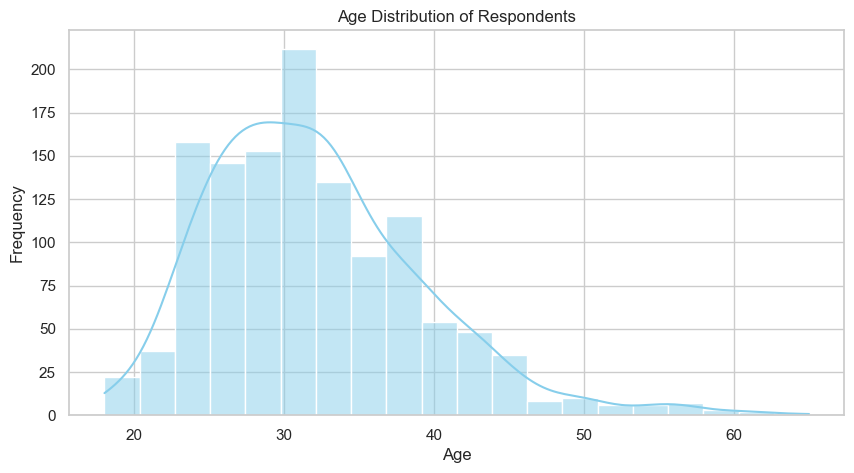

In [19]:
#Age Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['age'], kde=True, bins=20, color='skyblue')
plt.title('Age Distribution of Respondents')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


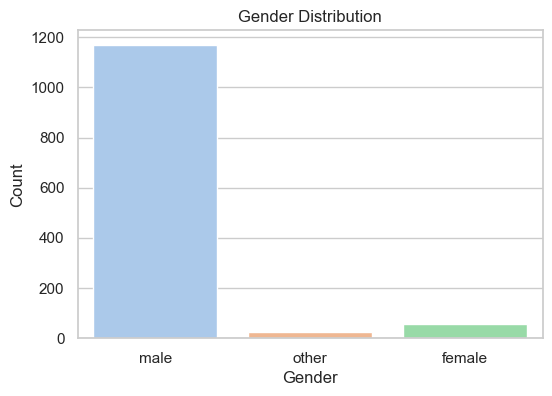

In [20]:
#Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='gender', palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


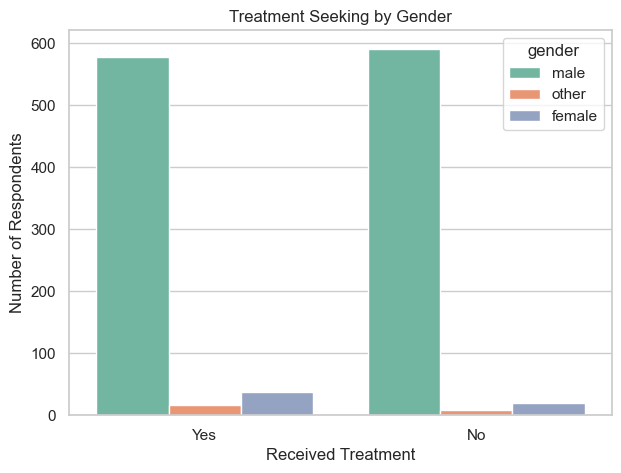

In [21]:
#Treatment vs Gender
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='treatment', hue='gender', palette='Set2')
plt.title('Treatment Seeking by Gender')
plt.xlabel('Received Treatment')
plt.ylabel('Number of Respondents')
plt.show()

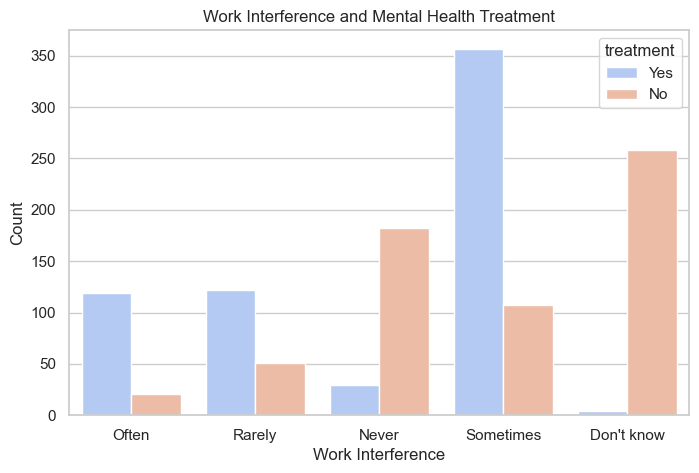

In [22]:
 #Work Interference vs Treatment
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='work_interfere', hue='treatment', palette='coolwarm')
plt.title('Work Interference and Mental Health Treatment')
plt.xlabel('Work Interference')
plt.ylabel('Count')
plt.show()

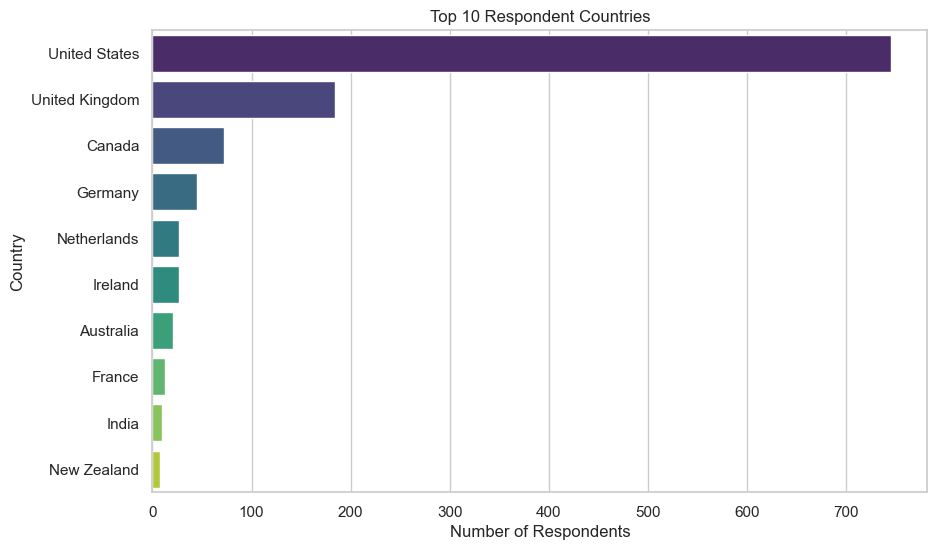

In [23]:
# Country-wise Respondents (Top 10)
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Respondent Countries')
plt.xlabel('Number of Respondents')
plt.ylabel('Country')
plt.show()

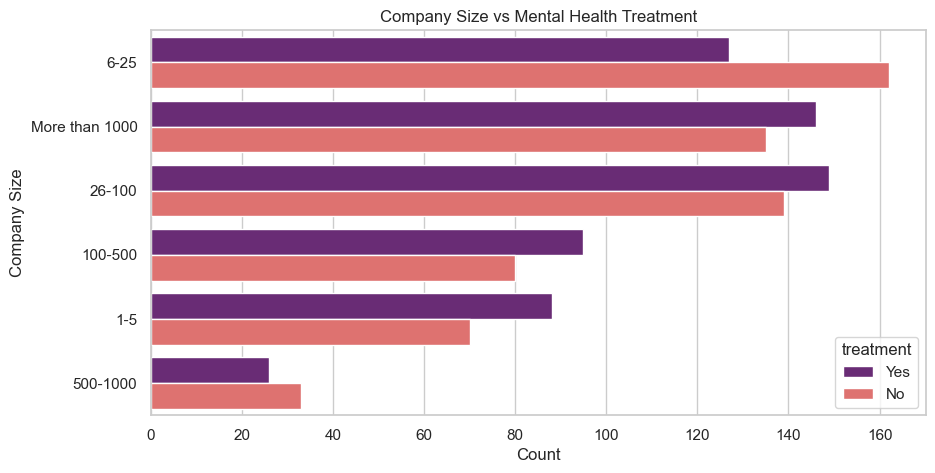

In [24]:
#Employees vs Mental Health Treatment
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='no_employees', hue='treatment', palette='magma')
plt.title('Company Size vs Mental Health Treatment')
plt.xlabel('Count')
plt.ylabel('Company Size')
plt.show()

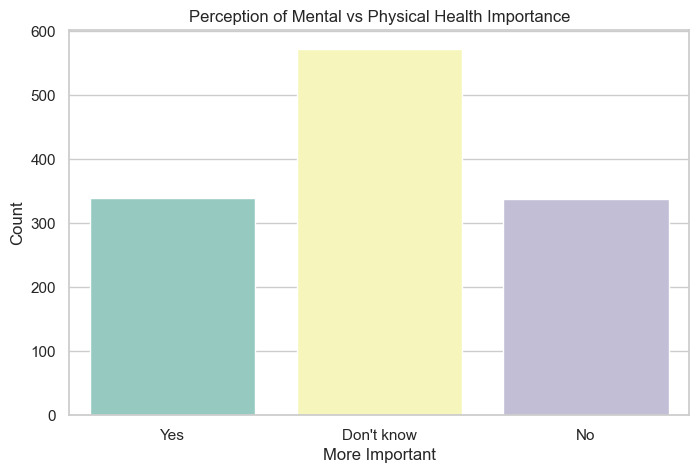

In [25]:
#Mental vs Physical Health Perception
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='mental_vs_physical', palette='Set3')
plt.title('Perception of Mental vs Physical Health Importance')
plt.xlabel('More Important')
plt.ylabel('Count')
plt.show()

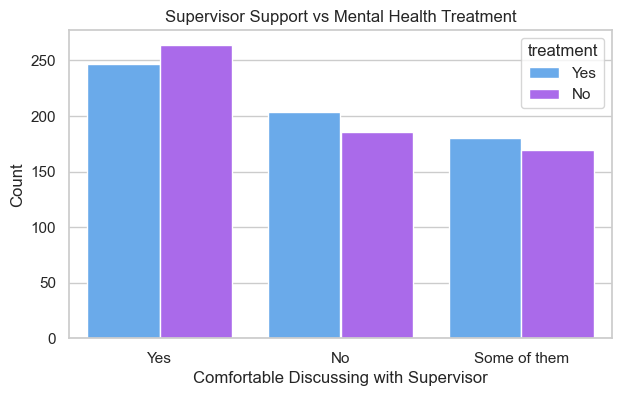

In [26]:
#Supervisor Support vs Treatment
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='supervisor', hue='treatment', palette='cool')
plt.title('Supervisor Support vs Mental Health Treatment')
plt.xlabel('Comfortable Discussing with Supervisor')
plt.ylabel('Count')
plt.show()

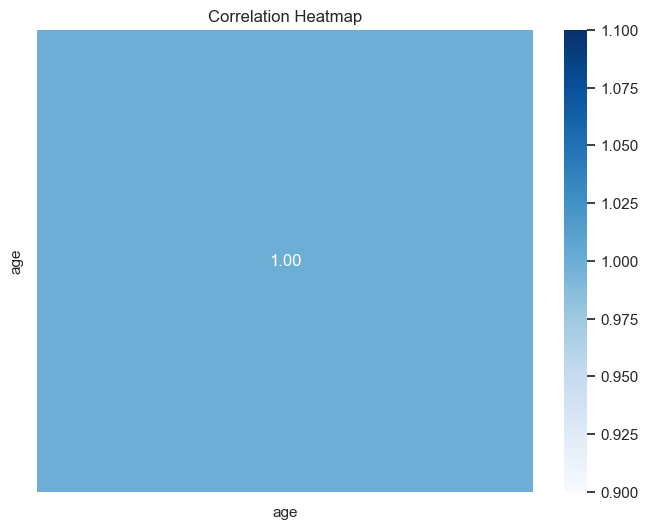

In [27]:
#Correlation Heatmap (Numerical Columns Only)
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


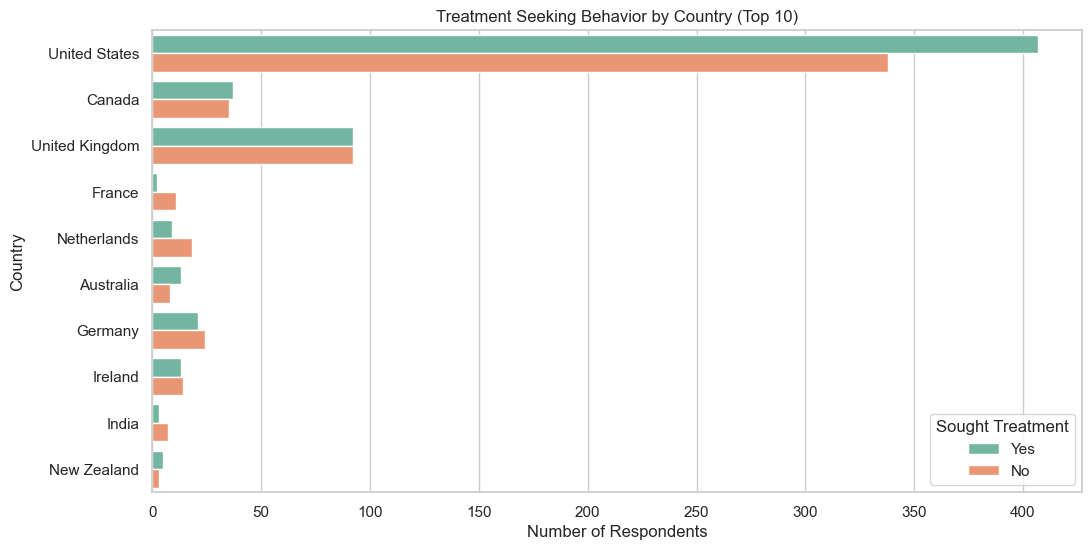

In [28]:
#Exploratory Steps:
#1. Frequency of Mental Health Treatment by Country
top_countries = df['country'].value_counts().head(10).index
plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['country'].isin(top_countries)],
              y='country', hue='treatment', palette='Set2')
plt.title('Treatment Seeking Behavior by Country (Top 10)')
plt.xlabel('Number of Respondents')
plt.ylabel('Country')
plt.legend(title='Sought Treatment')
plt.show()

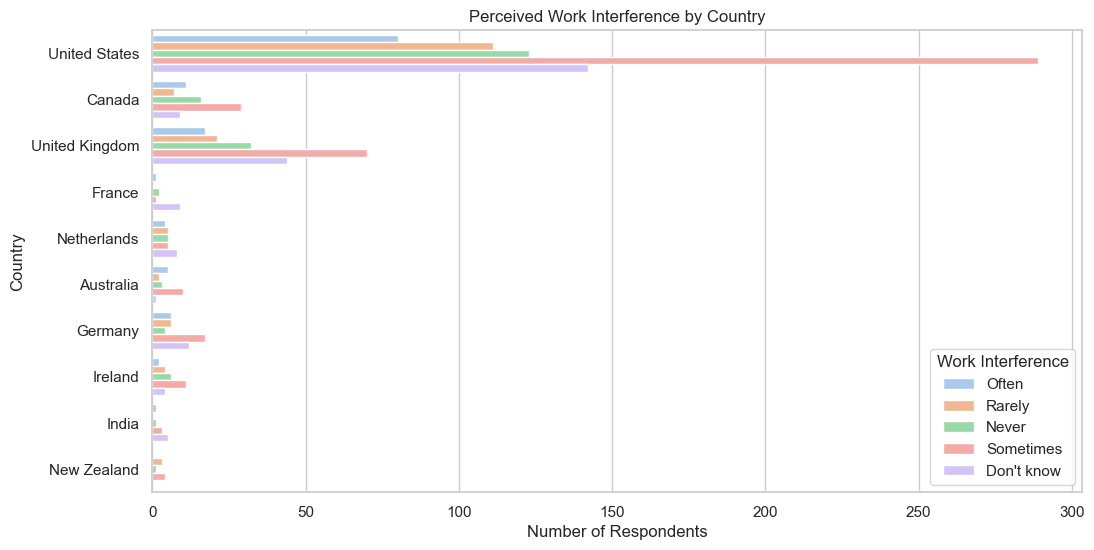

In [29]:
#Attitudes by Country – Work Interference
plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['country'].isin(top_countries)],
              y='country', hue='work_interfere', palette='pastel')
plt.title('Perceived Work Interference by Country')
plt.xlabel('Number of Respondents')
plt.ylabel('Country')
plt.legend(title='Work Interference')
plt.show()

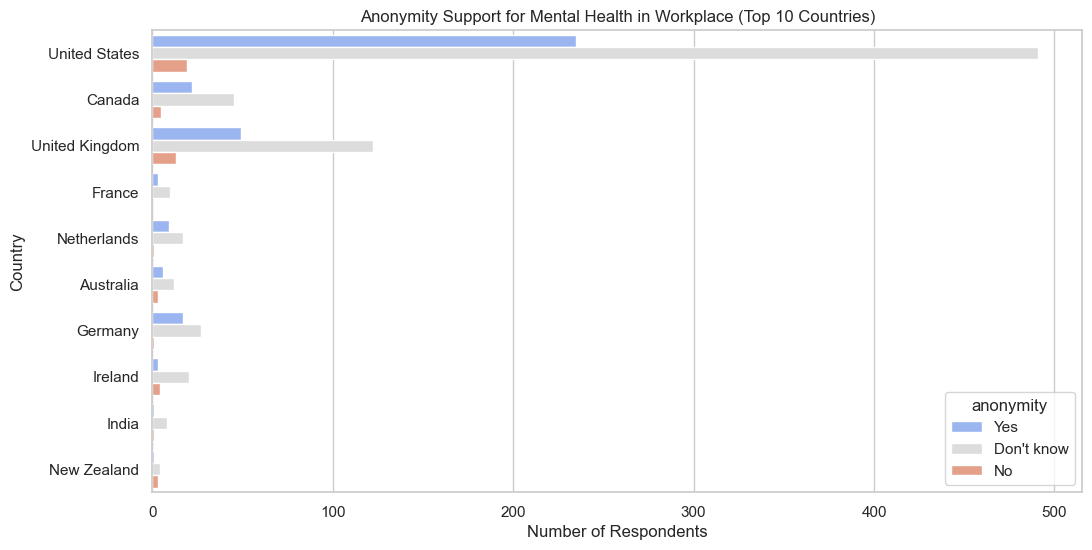

In [30]:
#Anonymity Support by Country
plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['country'].isin(top_countries)],
              y='country', hue='anonymity', palette='coolwarm')
plt.title('Anonymity Support for Mental Health in Workplace (Top 10 Countries)')
plt.xlabel('Number of Respondents')
plt.ylabel('Country')
plt.show()